In [1]:
%run "..\src\utils\style_and_packages.ipynb"

# Beispiel: Antwortspektrenverfahren an einem Rahmen


## Aufgabenstellung

Dies ist eine Weiterführung des bereits bekannten Rahmentragwerks aus @sec-mms_steif.

![Statisches System des Rahmentragwerks](../images/aufgabe_mms_steif_system.svg){#fig-mms_antwort_system_mms2}



Gesucht:

-  Eigenkreisfrequenz $\omega$ 
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
 &  1\\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
 &  1\\
\end{bmatrix}$$

- Skizze der Eigenformen 
- Statische Ersatzkräfte mit elastischem Antwortspektrum aus [@SIA261_2020] Abs. 16.2.3 auf Stockwerksebene. Überlagerung mit der SRSS-Methode.

Gegeben:

- Dehnsteifigkeit aller Stäbe $E\cdot A = \infty$
- Baugrundklasse B
- Erdbebenzone Z2

In [2]:
omega, t,  l, m_1, m_2, E,I, H = sp.symbols('omega, t,  l, m_1, m_2, E, I, H')

omega_n = sp.symbols('omega_n')

In [3]:
#| label: tbl-parameter_mms5
#| tbl-cap: Verwendete Parameter

params = {E: 30*10**3 *unit.N/unit.mm**2,
          I:2*10**9*unit.mm**4,
          m_1:2*20000*unit.N*unit.second**2/unit.m,
          m_2:20000*unit.N*unit.second**2/unit.m,
          H:3.2*unit.m,
          
          }

params_plot = convert.param_value(params)
render.dict_to_table(params)

|   |   |
|---|---|
| $E = \frac{30000 \text{N}}{\text{mm}^{2}}$ | $H = 3.2 \text{m}$ |
| $I = 2000000000 \text{mm}^{4}$ | $m_{1} = \frac{40000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $m_{2} = \frac{20000 \text{N} \text{s}^{2}}{\text{m}}$ | |


{{< pagebreak >}}

## Musterlösung 

Die Lösung deckt sich mit @sec-mms_steif_ML bis zu den ermittelten Eigenformen.

### Steifigkeitsmatrix $\mathbf{K}$


#### Horizontale Steifigkeit

In [4]:
k_1, k_2 = sp.symbols('k_1, k_2')

params['k_1'] = 2*(12 * 2*E*I / H**3).subs(params).simplify().evalf(6)
params['k_2'] = 2*(12 * E*I / H**3).subs(params).simplify().evalf(6)
K = sp.Matrix([[k_1 + k_2, -k_2],[-k_2, k_2]])


render.eq_display(sp.MatrixSymbol('K', 2,2), K,
                  sp.MatrixSymbol('K', 2,2), K.subs(params),
                  )

    ⎡k₁ + k₂  -k₂⎤
K = ⎢            ⎥
    ⎣  -k₂    k₂ ⎦

    ⎡ 1.31836e+8⋅newton   -4.39453e+7⋅newton ⎤
    ⎢ ─────────────────   ───────────────────⎥
    ⎢       meter                meter       ⎥
K = ⎢                                        ⎥
    ⎢-4.39453e+7⋅newton    4.39453e+7⋅newton ⎥
    ⎢───────────────────   ───────────────── ⎥
    ⎣       meter                meter       ⎦

### Eigenvektoren
#### Massenmatrix $\mathbf{M}$ 

In [5]:
m_1, m_2 = sp.symbols('m_1, m_2')
M = sp.Matrix([[m_1, 0],[0, m_2]])

render.eq_display(sp.MatrixSymbol('M', 2,2), M,
                  sp.MatrixSymbol('M', 2,2), M.subs(params))

    ⎡m₁  0 ⎤
M = ⎢      ⎥
    ⎣0   m₂⎦

    ⎡                   2                      ⎤
    ⎢40000⋅newton⋅second                       ⎥
    ⎢────────────────────           0          ⎥
    ⎢       meter                              ⎥
M = ⎢                                          ⎥
    ⎢                                         2⎥
    ⎢                      20000⋅newton⋅second ⎥
    ⎢         0            ────────────────────⎥
    ⎣                             meter        ⎦

#### Eigenkreisfrequenzen 

In [6]:
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      33.1 
ω₁ = ──────
     second

      66.3 
ω₂ = ──────
     second

#### Eigenvektoren $\phi$


$$
\phi_n = \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
$${#eq-mms_antwort_eigenvektor}

$$
[\mathbf{K}-\omega_n^2 \mathbf{M}]\cdot \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
=0
$${#eq-mms_antwort_eigenvektor_bestimmung}



In [7]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')
params['phi_21'] = 1

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_11 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_11).values())[0]

params['phi_11'] = phi_11.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_1**2 *M)*phi_1),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₁⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₁ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₁⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₁ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡0.5⎤
φ₁ = ⎢   ⎥
     ⎣1.0⎦

In [8]:
params['phi_22'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_12 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_12).values())[0]

params['phi_12'] = phi_12.subs(params).simplify() 




render.eq_display(sp.simplify((K-omega_2**2 *M)*phi_2),sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))

⎡                 ⎛                           ________________________________
⎢                 ⎜                          ╱   2   2                        
⎢             φ₁₂⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢-k₂⋅m₂⋅φ₂₂ + ────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           m₂                
⎢                                                                             
⎢                 ⎛                          _________________________________
⎢                 ⎜                         ╱   2   2                         
⎢             φ₂₂⋅⎝k₂⋅m₁ - m₂⋅(k₁ + k₂) - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k
⎢-k₂⋅m₁⋅φ₁₂ + ────────────────────────────────────────────────────────────────
⎢                                                   

     ⎡-1.0⎤
φ₂ = ⎢    ⎥
     ⎣1.0 ⎦

#### Orthogonalitätsbedingung

In [9]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                    2⎤
  T        ⎢3.0e+4⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

           ⎡                    2⎤
  T        ⎢6.0e+4⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢─────────────────────⎥
           ⎣        meter        ⎦

  T           
φ₂ ⋅M⋅φ₁ = [0]

  T           
φ₁ ⋅M⋅φ₂ = [0]

Für die Steifigkeitsmatrix:

In [10]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(4),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(4))

  T        ⎡3.3e+7⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢─────────────⎥
           ⎣    meter    ⎦

  T        ⎡2.64e+8⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

#### Eigenformen

![Die beiden Eigenformen skizziert](../images/aufgabe_mms_steif_eigenvektoren.svg){#fig-mms_antwort_eigenformen}

### Modale Analyse

Die Bewegungsgleichung für einen ungedämpften, frei schwingenden Mehrmassenschwinger lässt sich folgend beschreiben:

$$
\mathbf{M u''(t) + K u = 0}
$${#eq-mms_antwort_bewegungsgleichung}

Die Matrix-Gleichung beschreibt ein System aus Differentialgleichungen. Die Modale Analyse zielt darauf ab, diese zu entkoppeln. Bezogen auf den Mehrmassenschwinger heisst eine Entkoppelung, dass diese in Einmassenschwinger aufgeteilt werden. Dies wird nun schrittweise durchgeführt.

#### Modal- und Spektralmatrix

Mittels der Modal- und Spektralmatrix können die generalisierten Grössen ermittelt werden. Diese sind die Eigenschaften der einzelnen Einmassenschwinger. Die generalisierten Werte besitzen keine physikalische Bedeutung, sie sind abhängig von der Wahl der Eigenvektoren, welche bekanntlich von der Normierung abhängen.


Anhand der Bewegungsgleichung können die generalisierten Grössen bestimmt werden, es gilt:

$$
\Phi^T\mathbf{ M} \Phi \mathbf{u''(t)} + \Phi^T \mathbf{K} \Phi \mathbf{u(t)} = 0
$${#eq-mms_ant_beweg_generalisiert}

$$
\mathbf{M^*u''(t) + K^* u(t) = 0}
$${#eq-mms_ant_beweg_generalisiert_subs}

Alle $N$-Eigenwerte und alle $N$-Eigenvektoren können kompakt
mit Matrizen ausgedrückt werden:


In [11]:
Phi = sp.Matrix([[phi_1, phi_2]])
Omega = sp.Matrix([[omega_1, 0],[0, omega_2]])

render.eq_display('Modalmatrix', 'Phi',
                  sp.MatrixSymbol('Phi', 2, 2), Phi.subs(params).evalf(4),
                  'Spektralmatrix', 'Omega^2',
                  sp.MatrixSymbol('Omega^2', 2, 2), (Omega**2).subs(params).evalf(4))

Modalmatrix = Φ

    ⎡0.5  -1.0⎤
Φ = ⎢         ⎥
    ⎣1.0  1.0 ⎦

                  2
Spektralmatrix = Ω 

     ⎡ 1099.0         ⎤
     ⎢───────     0   ⎥
     ⎢      2         ⎥
     ⎢second          ⎥
Ω² = ⎢                ⎥
     ⎢          4395.0⎥
     ⎢   0     ───────⎥
     ⎢               2⎥
     ⎣         second ⎦

#### Generalisierte Grössen


In [12]:
M_star = Phi.T * M * Phi
K_star = Phi.T * K * Phi


render.eq_display(sp.MatrixSymbol('M^\star', 2,2),sp.simplify(M_star.subs(params)).evalf(5),
                  sp.MatrixSymbol('K^\star', 2,2),sp.simplify(K_star.subs(params)).evalf(5))
                 

           ⎡                     2                        ⎤
           ⎢30000.0⋅newton⋅second                         ⎥
           ⎢──────────────────────            0           ⎥
           ⎢        meter                                 ⎥
M__\star = ⎢                                              ⎥
           ⎢                                             2⎥
           ⎢                        60000.0⋅newton⋅second ⎥
           ⎢          0             ──────────────────────⎥
           ⎣                                meter         ⎦

           ⎡3.2959e+7⋅newton                  ⎤
           ⎢────────────────         0        ⎥
           ⎢     meter                        ⎥
K__\star = ⎢                                  ⎥
           ⎢                  2.6367e+8⋅newton⎥
           ⎢       0          ────────────────⎥
           ⎣                       meter      ⎦

#### Kontrolle der modalen Transformation

Durch die Transformation in generalisierte Grössen dürfen sich die Eigenkreisfrequenzen nicht ändern, da die entkoppelten EMS jeweils eine dieser beschreibt.

Durch Einsetzen der modalen Grössen in @eq-mms_antwort_eigenkreisfrequenz kann mit den ermittelten Kreisfrequenzen kontrolliert werden.

$$
\omega_n = \sqrt{\frac{k}{m}}
$${#eq-mms_antwort_eigenkreisfrequenz}

In [13]:
omega_1_kontrolle = sp.sqrt(K_star[0] / M_star[0])
omega_2_kontrolle = sp.sqrt(K_star[3] / M_star[3])

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_1_modal', omega_1_kontrolle.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(4),
                  'omega_2_modal', omega_2_kontrolle.subs(params).simplify().evalf(4))




      33.1 
ω₁ = ──────
     second

             33.1 
ω_1_modal = ──────
            second

     66.29 
ω₂ = ──────
     second

            66.29 
ω_2_modal = ──────
            second

#### Partizipationsfaktor $\Gamma$

Durch die modalen Grössen wissen wir wie die entkoppelten Einmassenschwinger definiert sind, bzw. welche Eigenschaften diese besitzen. Die Verteilung des Partizipationsfaktor gibt einen direkten Hinweis, welcher Eigenmode an der Gesamtanwort den grössten Einfluss (beteiligt bzw. partizipiert) hat.

$$
\Gamma_n = \frac{\Phi_n^T \mathbf{M 1}}{\Phi_n^T \mathbf{M}\Phi_n}
$${#eq-mms_antwort_Gamma_n}

In allgemeiner Form lautet der Partizipationsfaktor:

$$
\Gamma_n = \frac{\Phi_n^T \mathbf{M r^\star}}{\Phi_n^T \mathbf{M}\Phi_n}
$${#eq-mms_antwort_split_part}

$\mathbf{r^\star}$ beschreibt die Starrkörperverschiebung infolge der Erdbebenanregung $u_g$ am Fusspunkt des Gesamtsystems.



$$
\mathbf{r^\star} = \begin{bmatrix}
FHG_1 \\
FHG_2 
\end{bmatrix}=
\begin{bmatrix}
\cos(0) \\
\cos(0) 
\end{bmatrix}=
\begin{bmatrix}
1 \\
1 
\end{bmatrix}= \mathbf{1}
$${#eq-mms_antwort_rstar}

Die Partizipationsmatrix lässt sich direkt durch folgende Gleichung ermitteln:

$$
\Gamma = M^{\star-1} \cdot \Phi^T \cdot M \cdot 1
$${#eq-mms_antwort_matrix_part}

Gelöst mit @eq-mms_antwort_matrix_part:


In [14]:
one_vec = sp.ones(2,1)

Gamma = M_star**-1 * Phi.T * M*one_vec 

render.eq_display(
    sp.MatrixSymbol('Gamma',2,1), Gamma.subs(params).evalf(3))

    ⎡ 1.33 ⎤
Γ = ⎢      ⎥
    ⎣-0.333⎦

Gelöst mit @eq-mms_antwort_split_part:

In [15]:
gamma_1 = (phi_1.T*M*one_vec)[0]/(phi_1.T*M*phi_1)[0]
gamma_2 = (phi_2.T*M*one_vec)[0]/(phi_2.T*M*phi_2)[0]
gamma_sqr = sp.Matrix([[gamma_1**2],[gamma_2**2]])
render.eq_display('Gamma_1', gamma_1,
                  'Gamma_1', gamma_1.subs(params).evalf(3),
                  'Gamma_2', gamma_2,
                  'Gamma_2', gamma_2.subs(params).evalf(3),
                  sp.MatrixSymbol('Gamma^2_n',2,1),gamma_sqr.subs(params).evalf(3))

      m₁⋅φ₁₁ + m₂⋅φ₂₁ 
Γ₁ = ─────────────────
           2         2
     m₁⋅φ₁₁  + m₂⋅φ₂₁ 

Γ₁ = 1.33

      m₁⋅φ₁₂ + m₂⋅φ₂₂ 
Γ₂ = ─────────────────
           2         2
     m₁⋅φ₁₂  + m₂⋅φ₂₂ 

Γ₂ = -0.333

      ⎡1.78 ⎤
Γ²ₙ = ⎢     ⎥
      ⎣0.111⎦

#### Effektive Modale Massen

Durch Multiplikation der modalen Massen mit dem Partizipationsfaktor resultieren die effektiven modalen Massen.

In [16]:
m_1_eff = gamma_1**2 * M_star[0]
m_2_eff = gamma_2**2 * M_star[3]

render.eq_display('m_1eff', m_1_eff.subs(params).evalf(3),
                  'm_2eff', m_2_eff.subs(params).evalf(3),
                  'm_tot', (m_1_eff+m_2_eff).subs(params).evalf(3))


                              2
         5.33e+4⋅newton⋅second 
m_1eff = ──────────────────────
                 meter         

                              2
         6.67e+3⋅newton⋅second 
m_2eff = ──────────────────────
                 meter         

                           2
       6.0e+4⋅newton⋅second 
mₜₒₜ = ─────────────────────
               meter        

#### Modale Höhen

In [17]:
one_vec = sp.ones(2,1)


H_matrix = sp.Matrix([H, H])
H_modal = (H_matrix.T*M*Phi).T.multiply_elementwise((Phi.T*M*one_vec).applyfunc(lambda x: x**-1))


render.eq_display(
    sp.MatrixSymbol('H', 2,1), H_matrix,
    sp.MatrixSymbol('H', 2,1), H_modal,
    sp.MatrixSymbol('H', 2,1), H_modal.subs(params).evalf(3),

)

    ⎡H⎤
H = ⎢ ⎥
    ⎣H⎦

    ⎡H⋅m₁⋅φ₁₁ + H⋅m₂⋅φ₂₁⎤
    ⎢───────────────────⎥
    ⎢  m₁⋅φ₁₁ + m₂⋅φ₂₁  ⎥
H = ⎢                   ⎥
    ⎢H⋅m₁⋅φ₁₂ + H⋅m₂⋅φ₂₂⎥
    ⎢───────────────────⎥
    ⎣  m₁⋅φ₁₂ + m₂⋅φ₂₂  ⎦

    ⎡3.2⋅meter⎤
H = ⎢         ⎥
    ⎣3.2⋅meter⎦

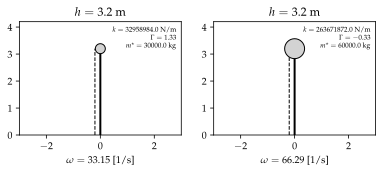

In [18]:
#| label: fig-mms_2_modale_EMS
#| fig-cap: "Darstellung der entkoppelten Einmassenschwinger"


hoehe = list(H_modal.subs(params).evalf(3)/unit.m)
hoehe = [np.float64(i).round(2) for i in hoehe]

masse = list(M_star.subs(params)/unit.N/unit.second**2 * unit.m)
masse = [np.float64(i).round(2) for i in masse if i != 0]

steifigkeiten = list(K_star.subs(params)/unit.N * unit.m)
steifigkeiten = [np.float64(i).round(2) for i in steifigkeiten if i != 0]

omegas = list(Omega.subs(params)*unit.second)
omegas = [np.float64(i).round(2) for i in omegas if i != 0]

gammas = list(Gamma.subs(params).evalf(3))
gammas = [np.float64(i).round(2) for i in gammas if i != 0]


plot_einmassenschwinger(hoehe, masse, steifigkeiten, omegas, gammas)

### Elastisches Antwortspektrum

Dem Vorgehen nach [@SIA261_2020] Abs. 16.2.3.1 entsprechend, werden folgende Parameter definiert:

- Baugrundklasse B
- Erdbebenzone Z2
- $a_{gd} = 1.0 \text{ M}/\text{s}^2$

In [19]:
a_gd = 1*unit.m/unit.second**2

#### Grundschwingzeit

Die Grundschwingzeit kann anhand der bereits ermittelten Eigenkreisfrequenzen ermittelt werden.

In [20]:
T_1 = (omega_1 /(2*sp.pi))**-1
T_2 = (omega_2 /(2*sp.pi))**-1

render.eq_display('T_1', T_1.subs(params).evalf(3),
                  'T_2', T_2.subs(params).evalf(3),
                  )

T₁ = 0.19⋅second

T₂ = 0.0948⋅second

#### Elastisches Antwortspektrum

In [21]:

S_e_1 = antwortspektrum(a_gd, T_1.subs(params).evalf(3), Baugrundklasse='B')
render.eq_display('S_e_1', S_e_1.evalf(3))

|   |   |
|---|---|
| $S = 1.2$ | $T_{B} = 0.08 \text{s}$ |
| $T_{C} = 0.35 \text{s}$ | $T_{D} = 2.0 \text{s}$ |
| $\eta = 1$ | |


Sₑ = 2.5⋅S⋅a_gd⋅η

       3.0⋅meter
Sₑ ₁ = ─────────
              2 
        second  

In [22]:
S_e_2 = antwortspektrum(a_gd, T_2.subs(params).evalf(3), Baugrundklasse='B')

render.eq_display('S_e_2', S_e_2.evalf(3))

|   |   |
|---|---|
| $S = 1.2$ | $T_{B} = 0.08 \text{s}$ |
| $T_{C} = 0.35 \text{s}$ | $T_{D} = 2.0 \text{s}$ |
| $\eta = 1$ | |


Sₑ = 2.5⋅S⋅a_gd⋅η

       3.0⋅meter
Sₑ ₂ = ─────────
              2 
        second  

#### Einwirkungen

In [23]:
F_11 = gamma_1*m_1_eff*phi_11*S_e_1
F_21 = gamma_1*m_2_eff*phi_21*S_e_1

F_12 = gamma_2*m_1_eff*phi_12*S_e_2
F_22 = gamma_2*m_2_eff*phi_22*S_e_2


F_jn = sp.Matrix([[F_11, F_12],[F_12,F_22]])

render.eq_display("F_11 ", "gamma_1*m_1_eff*phi_11*S_e_1",
"F_21" , "gamma_1*m_2_eff*phi_21*S_e_1",
"F_12" , "gamma_2*m_1_eff*phi_12*S_e_2",
"F_22" , "gamma_2*m_2_eff*phi_22*S_e_2",


sp.MatrixSymbol('F_jn', 2,2),F_jn.subs(params).evalf(3))

F₁₁ = Sₑ ₁⋅γ₁⋅m_1_eff⋅φ₁₁

F₂₁ = Sₑ ₁⋅γ₁⋅m_2_eff⋅φ₂₁

F₁₂ = Sₑ ₂⋅γ₂⋅m_1_eff⋅φ₁₂

F₂₂ = Sₑ ₂⋅γ₂⋅m_2_eff⋅φ₂₂

       ⎡1.07e+5⋅newton  5.33e+4⋅newton ⎤
F_jn = ⎢                               ⎥
       ⎣5.33e+4⋅newton  -6.67e+3⋅newton⎦

#### Deformation

In [24]:
u_11 = gamma_1*phi_11*S_e_1/omega_1**2
u_21 = gamma_1*phi_21*S_e_1/omega_1**2
u_12 = gamma_2*phi_12*S_e_2/omega_2**2
u_22 = gamma_2*phi_22*S_e_2/omega_2**2


u_jn = sp.Matrix([[u_11, u_12],[u_12,u_22]])

render.eq_display(
    "u_11" ," gamma_1*phi_11*S_e_1/omega_1**2",
    "u_21" , "gamma_1*phi_21*S_e_1/omega_1**2",
    "u_12" , "gamma_2*phi_12*S_e_2/omega_2**2",
    "u_22" ,"gamma_2*phi_22*S_e_2/omega_2**2",
    sp.MatrixSymbol('u_jn', 2,2),unit.convert_to(u_jn.subs(params).evalf(3),unit.mm))

      Sₑ ₁⋅γ₁⋅φ₁₁
u₁₁ = ───────────
            2    
          ω₁     

      Sₑ ₁⋅γ₁⋅φ₂₁
u₂₁ = ───────────
            2    
          ω₁     

      Sₑ ₂⋅γ₂⋅φ₁₂
u₁₂ = ───────────
            2    
          ω₂     

      Sₑ ₂⋅γ₂⋅φ₂₂
u₂₂ = ───────────
            2    
          ω₂     

       ⎡1.82⋅millimeter   0.228⋅millimeter ⎤
u_jn = ⎢                                   ⎥
       ⎣0.228⋅millimeter  -0.228⋅millimeter⎦

### Überlagerung der EMS

Um die Entkoppelung rückzuführen, gilt es die erhaltenen Resultate zu überlagern. Dabei gibt es unterschiedliche Ansätze. Bei weit auseinander liegenden Eigenfrequenzen kann die SRSS-Überlagerung verwendet werden.

$$
V_{b2max} = \sqrt{\sum_{n=1}^2 f_{j,n}^2}
$${#eq-mms_antwort_v_max}

In [25]:
V_b1_max = sp.sqrt(F_11**2 + F_12**2)
V_b2_max = sp.sqrt(F_21**2 + F_22**2)

render.eq_display("V_b1_max" ,"sqrt(F_11**2 + F_12**2)",
'V_b1max',V_b1_max.subs(params).evalf(3),
"V_b2_max" , "sqrt(F_21**2 + F_22**2)",
'V_b2max', V_b2_max.subs(params).evalf(3))

              _____________
             ╱    2      2 
V_b1_max = ╲╱  F₁₁  + F₁₂  

V_b1max = 1.19e+5⋅newton

              _____________
             ╱    2      2 
V_b2_max = ╲╱  F₂₁  + F₂₂  

V_b2max = 2.75e+4⋅newton

Deformationen:

$$
u_{bn} = \sqrt{\sum_{n=1}^2 u_{j,n}^2}
$${#eq-mms_antwort_u_max}

In [26]:
u_b1 = sp.sqrt(u_11**2 + u_12**2)
u_b2 = sp.sqrt(u_21**2 + u_22**2)

render.eq_display(
"u_b1" , "sqrt(u_11**2 + u_12**2)",
'u_b1',unit.convert_to(u_b1.subs(params).evalf(3), unit.mm),
"u_b2", "sqrt(u_21**2 + u_22**2)",
'u_b2', unit.convert_to(u_b2.subs(params).evalf(3),unit.mm))

          _____________
         ╱    2      2 
u_b1 = ╲╱  u₁₁  + u₁₂  

u_b1 = 1.83⋅millimeter

          _____________
         ╱    2      2 
u_b2 = ╲╱  u₂₁  + u₂₂  

u_b2 = 3.65⋅millimeter

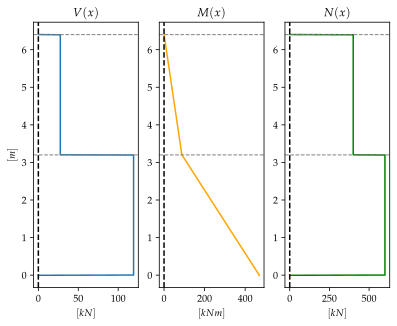

In [27]:
#| label: fig-mms_ant_schnittgroessen
#| fig-cap: "Maximale Schnittgrössen"

# Querkraft
V_x = sp.Piecewise((V_b1_max.subs(params)/unit.N, ((x>0)&(x<=H.subs(params_plot)))), (V_b2_max.subs(params)/unit.N, ((x>=H.subs(params_plot))&(x<=(H+H).subs(params_plot)))), (0,True))

# Biegemoment
C_1 = sp.symbols('C_1')
M_x = sp.integrate(-V_x, x) + C_1
C_1_solve = sp.solve(M_x.subs(x, (H+H).subs(params_plot)), C_1)[0]
M_x = M_x.subs(C_1, C_1_solve)

# Normalkraft
g = 10*unit.m/unit.second**2
N_x = sp.Piecewise(((m_1+m_2).subs(params)*g/unit.N, ((x>0)&(x<=H.subs(params_plot)))),(m_1.subs(params)*g/unit.N, ((x>=H.subs(params_plot))&(x<=(H+H).subs(params_plot)))), (0,True))



# Numerische Daten generieren

x_array = np.linspace(-0.01, float((H+H+0.01).subs(params_plot)), 1000)



V_x_lamb = sp.lambdify(x, V_x)
V_x_array = V_x_lamb(x_array)

M_x_lamb = sp.lambdify(x,M_x)
M_x_array = M_x_lamb(x_array)

N_x_lamb = sp.lambdify(x,N_x)
N_x_array = N_x_lamb(x_array)

# Figure und Axes erstellen
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Ersten Plot erstellen

ax1.plot(V_x_array/1000, x_array)
ax1.set_title('$V(x)$')

## Horizontale Linien
ax1.axhline(H.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax1.axhline((H+H).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax1.set_xlabel('$[kN]$')
ax1.set_ylabel('$[m]$')

ax1.axvline(0,linestyle='dashed', color='black')


# Zweiten Plot erstellen

ax2.plot(M_x_array/1000, x_array, color='orange')
ax2.set_title('$M(x)$')

## Horizontale Linien
ax2.axhline(H.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax2.axhline((H+H).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax2.set_xlabel('$[kNm]$')

ax2.axvline(0,linestyle='dashed', color='black')


# Dritten Plot erstellen

ax3.plot(N_x_array/1000, x_array, color='green')
ax3.set_title('$N(x)$')
ax3.set_xlabel('$[kN]$')


## Horizontale Linien
ax3.axhline(H.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax3.axhline((H+H).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)


ax3.axvline(0,linestyle='dashed', color='black')



# Plots anzeigen
plt.show()




Die Schnittgrössen in @fig-mms_ant_schnittgroessen sind als umhüllende Grössen zu interpretieren. Aufgrund der Überlagerung der unterschiedlichen Schwingformen mittels SRSS-Regel werden die Schnittgrössen jeweils addiert, ohne Berücksichtigung der Vorzeichen.